# Exploratory data analysis

## Importing libraries

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

## Importing data

In [2]:
df = pd.read_csv('BioGeoDatabase.csv', parse_dates = ['Timestamp', 'Date'])

## Data basics

In [3]:
df.sample(5)

,ID,Timestamp,Date,Hour,HR,EDA,BVP,TEMP,ACC_X,ACC_Y,ACC_Z,ACC_Overall,Tag,Work,Job,Sex,Autonomy_perceived,Stress_perceived,Stress_PSS
2188725,A00708,2019-07-17 01:52:44,2019-07-17,01:52:44,128.65,0.022744,-0.046719,23.47,0.000404,-8.062300e-05,4.163336e-17,0.007309,0,0,doctor,M,10,7,22
2236132,A00708,2019-07-17 15:02:51,2019-07-17,15:02:51,127.95,0.027228,-0.070938,25.69,-0.000018,-2.220446e-16,-1.826025e-04,0.008926,0,1,doctor,M,10,7,22
1620826,A00F3D2,2019-07-23 04:30:33,2019-07-23,04:30:33,130.87,0.029746,0.064375,25.73,0.000160,-3.633562e-04,-3.431415e-04,0.006688,0,0,nurse,F,8,7,17
1845804,A00E0B,2019-07-17 17:25:14,2019-07-17,17:25:14,82.87,0.067899,43.039687,31.81,-0.101490,-1.498015e-02,-3.060503e-02,0.152388,0,0,nurse,M,6,7,21
1949904,A00E0B,2019-07-18 22:20:14,2019-07-18,22:20:14,90.88,0.073663,-28.887813,32.93,0.005673,-2.102241e-03,9.631908e-03,0.076347,0,0,nurse,M,6,7,21


In [4]:
print(f'Data includes {df.shape[0]} entries for {df.ID.nunique()} individuals with {df.shape[1]-4} features')

Data includes 2283336 entries for 11 individuals with 15 features


In [101]:
# Entries by participant
s = df['ID'].value_counts() 
count = pd.DataFrame({'ID':s.index, 'Count':s.values})
fig = px.bar(count, y='Count', x='ID', text = 'Count', color = 'ID', color_discrete_sequence=px.colors.sequential.RdBu, width=800, height=500)
fig.update_layout(paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)', showlegend=False)
fig.show()

In [100]:
# Number of days by individual
df.groupby('ID')['Date'].nunique()

ID
A000C8     6
A00520     6
A00708     3
A00BAF     2
A00C5A     9
A00E0B     5
A00F3D1    5
A00F3D2    4
A01179     6
A016901    6
A016902    4
Name: Date, dtype: int64

In [23]:
# Participants
df.ID.unique()

array(['A00520', 'A00C5A', 'A000C8', 'A016902', 'A01179', 'A016901',
       'A00BAF', 'A00F3D2', 'A00E0B', 'A00F3D1', 'A00708'], dtype=object)

In [64]:
# Job titles
job = df[['ID','Job']].drop_duplicates().reset_index(drop=True)
s = job['Job'].value_counts() 
count = pd.DataFrame({'Job':s.index, 'Count':s.values})
fig = px.bar(count, y='Count', x='Job', text = 'Count', color = 'Job', color_discrete_sequence=px.colors.sequential.RdBu, width=500, height=300)
fig.update_layout(paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)', showlegend=False)
fig.show()

In [5]:
# Sex
sex = df[['ID','Sex']].drop_duplicates().reset_index(drop=True)
s = sex['Sex'].value_counts() 
count = pd.DataFrame({'Sex':s.index, 'Count':s.values})
fig = px.bar(count, y='Count', x='Sex', text = 'Count', color = 'Sex', color_discrete_sequence=px.colors.sequential.RdBu, width=500, height=300)
fig.update_layout(paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)', showlegend=False)
fig.show()

In [3]:
# Job, sex, perceived autonomy ans stress levels, PSS stress score
show = pd.DataFrame()
all = df[['ID','Job','Sex','Autonomy_perceived','Stress_perceived','Stress_PSS']]
for id in all.ID.unique():
    one = all.loc[all.ID == id]
    show = show.append(one.iloc[0,:])
show.sort_values(by='Job').reset_index(drop=True)

,ID,Job,Sex,Autonomy_perceived,Stress_perceived,Stress_PSS
0,A00C5A,doctor,F,8,8,19
1,A00708,doctor,M,10,7,22
2,A00520,not known,not known,not known,not known,not known
3,A01179,not known,not known,not known,not known,not known
4,A00BAF,not known,not known,not known,not known,not known
5,A016902,nurse,F,7,9,22
6,A016901,nurse,F,8,5,22
7,A00F3D2,nurse,F,8,7,17
8,A00E0B,nurse,M,6,7,21
9,A00F3D1,nurse,F,10,8,21


In [68]:
# Tags - reported stress
df.loc[df.Tag == 1][['ID','Timestamp','Tag']].reset_index(drop=True)

,ID,Timestamp,Tag
0,A00520,2019-07-18 12:33:57,1
1,A00520,2019-07-18 12:34:05,1
2,A00520,2019-07-18 12:34:10,1
3,A00520,2019-07-18 12:34:11,1
4,A00C5A,2019-07-16 19:02:28,1
...,...,...,...
57,A00F3D2,2019-07-23 11:41:34,1
58,A00F3D2,2019-07-24 05:09:28,1
59,A00F3D2,2019-07-24 05:10:41,1
60,A00F3D2,2019-07-24 05:14:52,1


In [81]:
df.loc[df.Tag == 1][['ID','Tag']].groupby('ID').sum()

,Tag
ID,
A000C8,3
A00520,4
A00C5A,25
A00F3D2,26
A016901,4


In [33]:
# Working hours
for i in df.loc[df.Work == 1]['ID'].unique():
    print(f"Total number of entries for {i} indicated as:")
    print(f"- non-working hours: {df.loc[df.ID == i]['Work'].value_counts()[0]} which is an equvalent of {round(df.loc[df.ID == i]['Work'].value_counts()[0] / 3600, 2)} hours")
    print(f"- working hours: {df.loc[df.ID == i]['Work'].value_counts()[1]} which is an equvalent of {round(df.loc[df.ID == i]['Work'].value_counts()[1] / 3600, 2)} hours")

Total number of entries for A00C5A indicated as:
- non-working hours: 181052 which is an equvalent of 50.29 hours
- working hours: 90633 which is an equvalent of 25.18 hours
Total number of entries for A00F3D2 indicated as:
- non-working hours: 196192 which is an equvalent of 54.5 hours
- working hours: 51787 which is an equvalent of 14.39 hours
Total number of entries for A00E0B indicated as:
- non-working hours: 155930 which is an equvalent of 43.31 hours
- working hours: 96248 which is an equvalent of 26.74 hours
Total number of entries for A00708 indicated as:
- non-working hours: 86973 which is an equvalent of 24.16 hours
- working hours: 65358 which is an equvalent of 18.16 hours


## Basic statistics

In [11]:
describe = pd.DataFrame({'HR': df['HR'].describe()})
describe = describe.reset_index()
for i in df.iloc[:,5:14].columns:
    add = pd.DataFrame({i: df[i].describe()})
    add = add.reset_index()
    describe = pd.merge(describe, add, on='index')

In [19]:
pd.options.display.float_format = '{:,.3f}'.format
describe.set_index('index')

,HR,EDA,BVP,TEMP,ACC_X,ACC_Y,ACC_Z,ACC_Overall,Tag,Work
index,,,,,,,,,,
count,"2,283,336.000","2,283,336.000","2,283,336.000","2,283,336.000","2,283,336.000","2,283,336.000","2,283,336.000","2,283,336.000","2,283,336.000","2,283,336.000"
mean,103.943,1.920,0.000,31.006,0.000,0.000,0.000,0.074,0.000,0.040
std,35.104,4.064,38.074,4.224,0.021,0.023,0.027,0.112,0.005,0.195
min,38.770,0.000,"-1,039.268",22.350,-0.367,-0.342,-0.301,0.000,0.000,0.000
25%,78.100,0.026,-3.434,26.470,-0.001,-0.001,-0.001,0.005,0.000,0.000
50%,91.020,0.106,0.004,32.590,0.000,0.000,0.000,0.013,0.000,0.000
75%,121.830,1.619,3.672,34.270,0.001,0.001,0.001,0.112,0.000,0.000
max,212.320,54.312,"1,074.737",39.000,0.311,0.314,0.303,2.179,1.000,1.000


## Sensor reading distributions

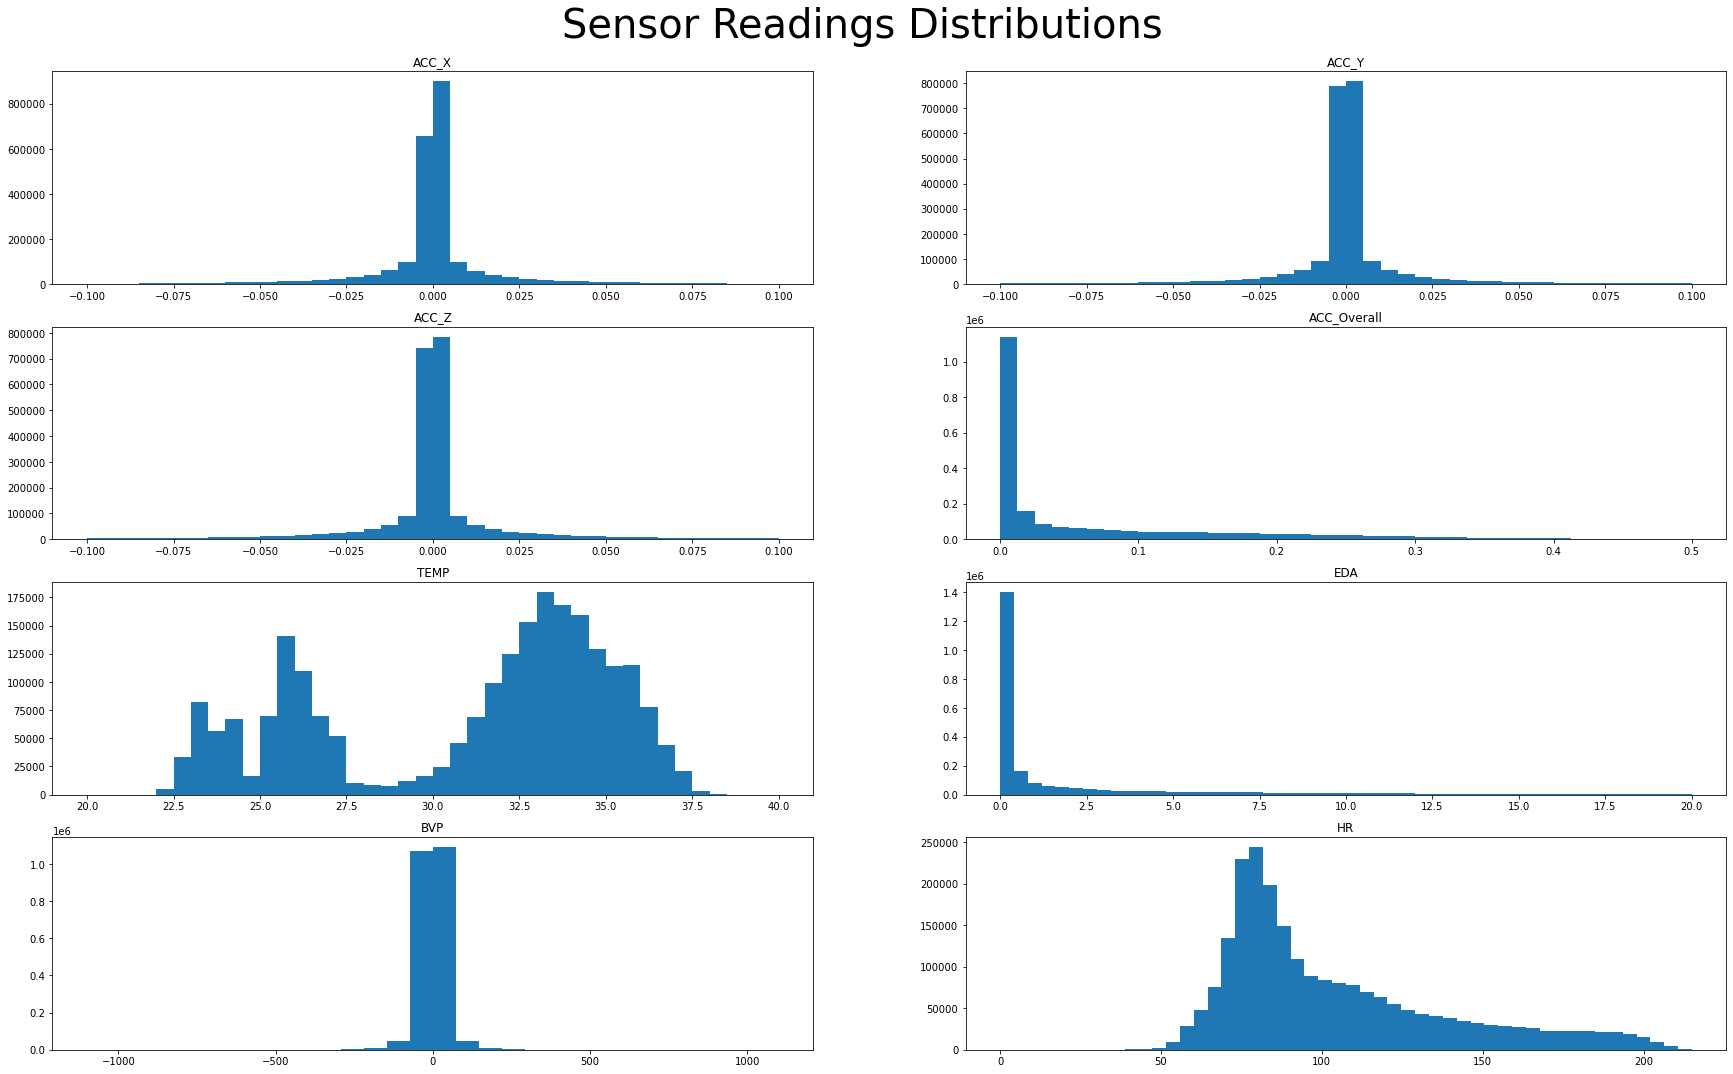

In [7]:
fig, ax = plt.subplots(4, 2, figsize = (30,18))

ax[0,0].hist(df['ACC_X'], 40, range = [-0.1, 0.1])
ax[0, 0].set_title('ACC_X')
ax[0,1].hist(df['ACC_Y'], 40, range = [-0.1, 0.1])
ax[0,1].set_title('ACC_Y')
ax[1,0].hist(df['ACC_Z'], 40, range = [-0.1, 0.1])
ax[1,0].set_title('ACC_Z')
ax[1,1].hist(df['ACC_Overall'], 40, range = [0, 0.5])
ax[1,1].set_title('ACC_Overall')
ax[2,0].hist(df['TEMP'], 40, range = [20, 40])
ax[2,0].set_title('TEMP')
ax[2,1].hist(df['EDA'], 50, range = [0, 20])
ax[2,1].set_title('EDA')
ax[3,0].hist(df['BVP'], 30, range = [-1100, 1100])
ax[3,0].set_title('BVP')
ax[3,1].hist(df['HR'], 50, range = [0, 215])
ax[3,1].set_title('HR')

plt.suptitle("Sensor Readings Distributions", size = 40, y = 0.93)
plt.show()